In [25]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = './Resource_Management_Process.csv'
df = pd.read_csv(csv_path)
df

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
0,2021-02-08 0:15,116,-4.2,65.6,109.8,Monday,0.13,1.5,103
1,2021-02-08 0:30,116,-4.2,63.5,109.8,Monday,0.13,1.5,100
2,2021-02-08 0:45,114,-4.2,67.6,109.8,Monday,0.14,1.5,109
3,2021-02-08 1:00,114,-5.5,72.8,109.8,Monday,0.13,1.5,161
4,2021-02-08 1:15,116,-5.5,67.4,109.8,Monday,0.15,1.5,136
...,...,...,...,...,...,...,...,...,...
24474,2021-10-21 22:45,129,23.6,74.0,167.2,Thursday,0.30,1.5,162
24475,2021-10-21 23:00,217,22.5,74.6,167.2,Thursday,1.07,1.5,134
24476,2021-10-21 23:15,217,22.2,71.3,167.2,Thursday,1.05,1.5,157
24477,2021-10-21 23:30,213,23.1,72.7,167.2,Thursday,1.05,1.5,163


In [8]:
# dowReplace_df = df
# def categorical_Day_label(dowReplace_df):
#     day_list = list(dowReplace_df['DoW'].unique())
#     day_dict = {}
#     for i,day in enumerate(day_list):
#         day_dict[day]=i
#     day_index_list = []
#     for day_ in list(dowReplace_df['DoW']):
#         day_index_list.append(day_dict[day_])
#     return day_index_list
# dowReplace_df['day'] = categorical_Day_label(dowReplace_df)
# dowReplace_df.drop(columns=['DoW'], inplace=True)
# df

In [26]:
###DoW의 값을 숫자로 매핑
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

dowReplace_df = df
# DoW 열의 값을 변경
dowReplace_df['DoW'] = dowReplace_df['DoW'].map(day_mapping)

# 변경된 DataFrame 확인
dowReplace_df

,Datetime,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power,Man_Cost,Power_Usage
0,2021-02-08 0:15,116,-4.2,65.6,109.8,0,0.13,1.5,103
1,2021-02-08 0:30,116,-4.2,63.5,109.8,0,0.13,1.5,100
2,2021-02-08 0:45,114,-4.2,67.6,109.8,0,0.14,1.5,109
3,2021-02-08 1:00,114,-5.5,72.8,109.8,0,0.13,1.5,161
4,2021-02-08 1:15,116,-5.5,67.4,109.8,0,0.15,1.5,136
...,...,...,...,...,...,...,...,...,...
24474,2021-10-21 22:45,129,23.6,74.0,167.2,3,0.30,1.5,162
24475,2021-10-21 23:00,217,22.5,74.6,167.2,3,1.07,1.5,134
24476,2021-10-21 23:15,217,22.2,71.3,167.2,3,1.05,1.5,157
24477,2021-10-21 23:30,213,23.1,72.7,167.2,3,1.05,1.5,163


In [27]:
# 'Man_Cost', 'Power_Usage' 열을 제외한 데이터프레임 생성
dowReplace_df_without_Man_Cost_Power_Usage = dowReplace_df.drop(columns=['Man_Cost', 'Power_Usage'])

# 상관 계수 계산
corr= dowReplace_df_without_Man_Cost_Power_Usage.corr(numeric_only=True)

# 시각화
corr.style.background_gradient(cmap='coolwarm')

,Production,Temperature,Humidity,Power_Cost,DoW,Worker_Power
Production,1.000000,0.123660,-0.106838,0.073177,0.132880,0.784709
Temperature,0.123660,1.000000,0.398863,0.807716,-0.033114,0.035426
Humidity,-0.106838,0.398863,1.000000,0.521753,-0.038644,-0.119009
Power_Cost,0.073177,0.807716,0.521753,1.000000,-0.040614,-0.017753
DoW,0.132880,-0.033114,-0.038644,-0.040614,1.000000,0.118157
Worker_Power,0.784709,0.035426,-0.119009,-0.017753,0.118157,1.000000


In [28]:
#y종속변수인 Man_Cost와 x간의 상관 계수 분석
corr_Man_Cost = dowReplace_df[['Man_Cost', 'Production', 'Temperature', 'Humidity', 'Power_Cost', 'DoW', 'Worker_Power']].corr().iloc[0]

# 결과 출력
print(corr_Man_Cost)

Man_Cost        1.000000
Production     -0.278331
Temperature    -0.192990
Humidity        0.305062
Power_Cost      0.000054
DoW             0.000048
Worker_Power   -0.181563
Name: Man_Cost, dtype: float64


In [29]:
#y종속변수인 Power_Usage와 x간의 상관 계수 분석
corr_Power_Usage = dowReplace_df[['Power_Usage', 'Production', 'Temperature', 'Humidity', 'Power_Cost', 'DoW', 'Worker_Power']].corr().iloc[0]

# 결과 출력
print(corr_Power_Usage)

Power_Usage     1.000000
Production      0.516299
Temperature     0.044743
Humidity       -0.089923
Power_Cost      0.052568
DoW             0.226549
Worker_Power    0.289897
Name: Power_Usage, dtype: float64


C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

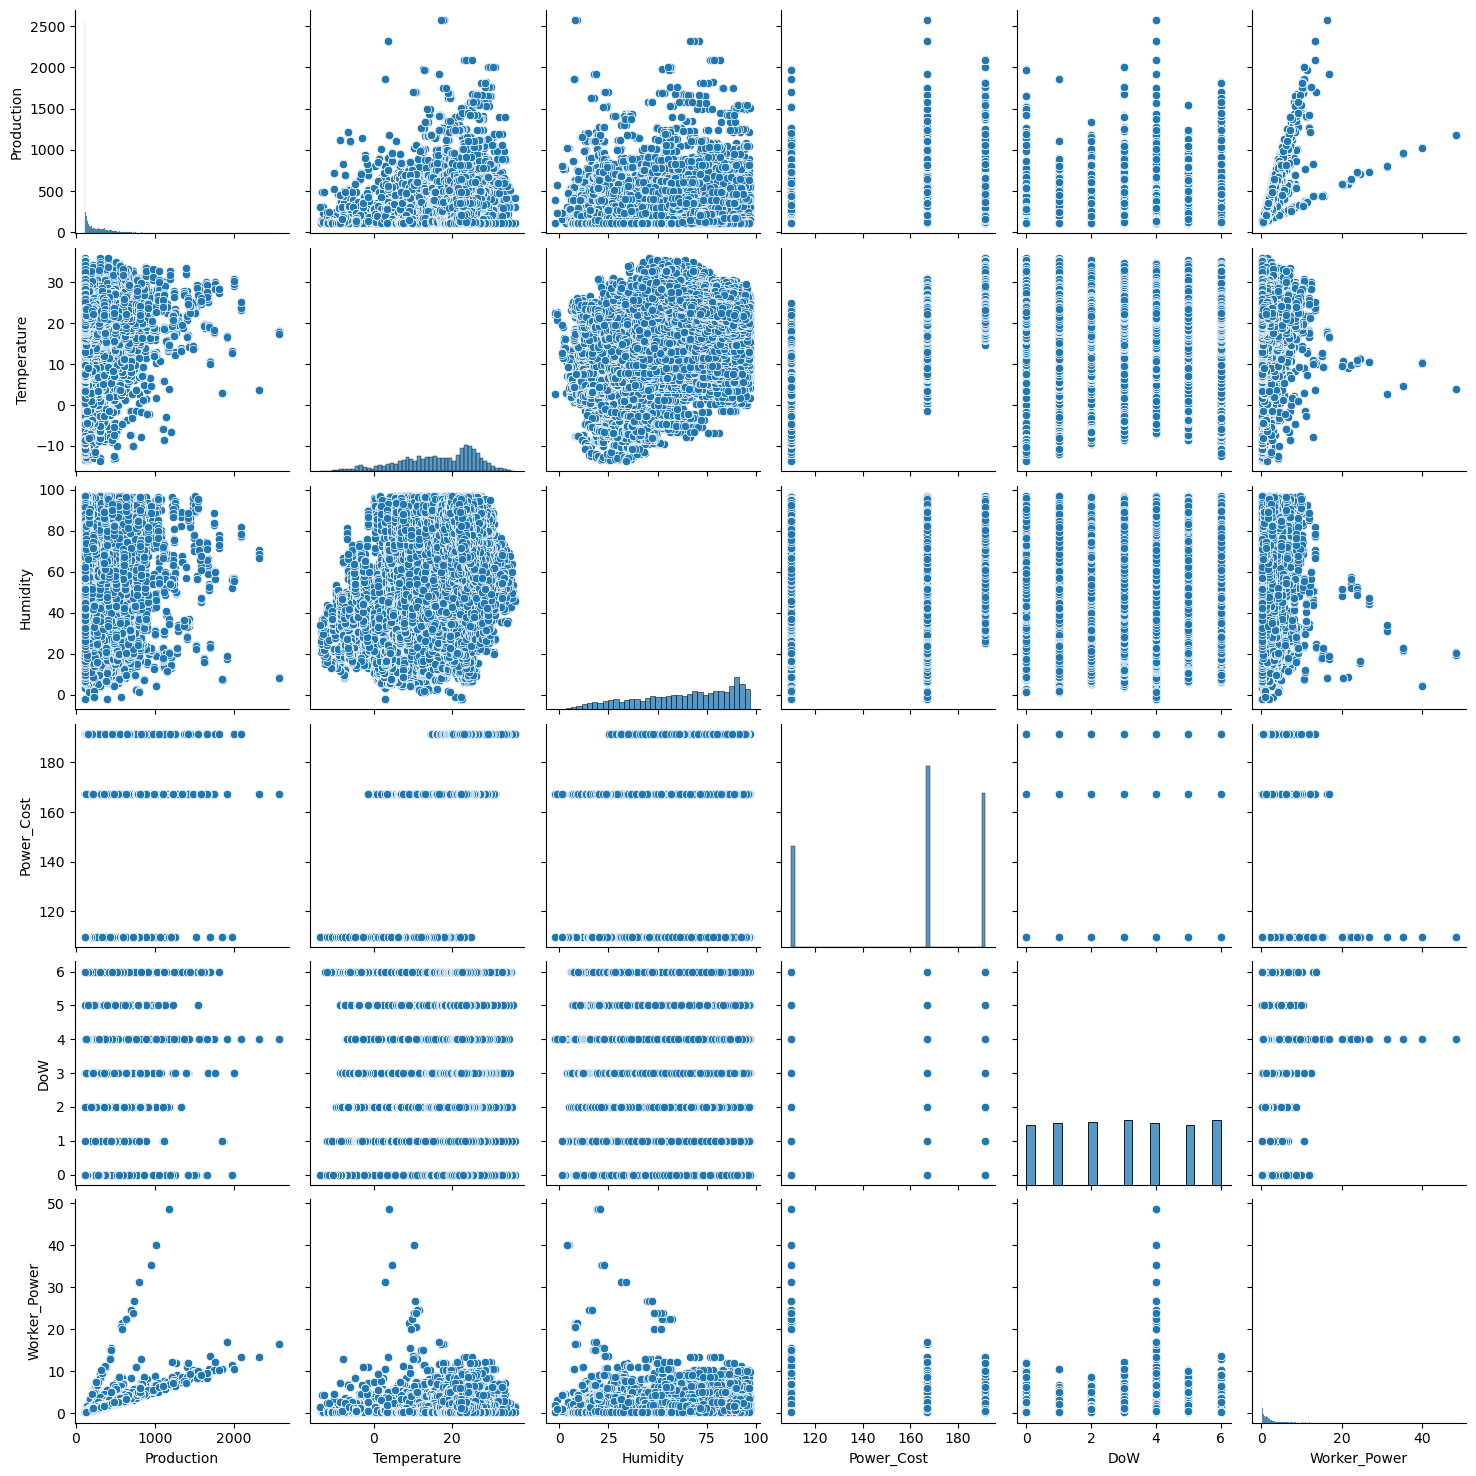

In [66]:
sns.pairplot(dowReplace_df[['Production', 'Temperature', 'Humidity', 'Power_Cost', 'DoW', 'Worker_Power']])
plt.show()

In [64]:
columns_to_drop = ['Temperature', 'Power_Cost', 'Humidity']
semifinal_df = dowReplace_df.drop(columns=columns_to_drop)

In [ ]:
columns_to_drop1 = ['Temperature', 'Power_Cost', 'Humidity']
columns_to_drop = ['Temperature', 'Power_Cost', 'Humidity']
semifinal_df = dowReplace_df.drop(columns=columns_to_drop)

semifinal_df = dowReplace_df.drop(columns=columns_to_drop)

In [67]:
# 이상치를 식별하여 개수와 함께 출력하는 함수
def detect_and_count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index, len(outliers)

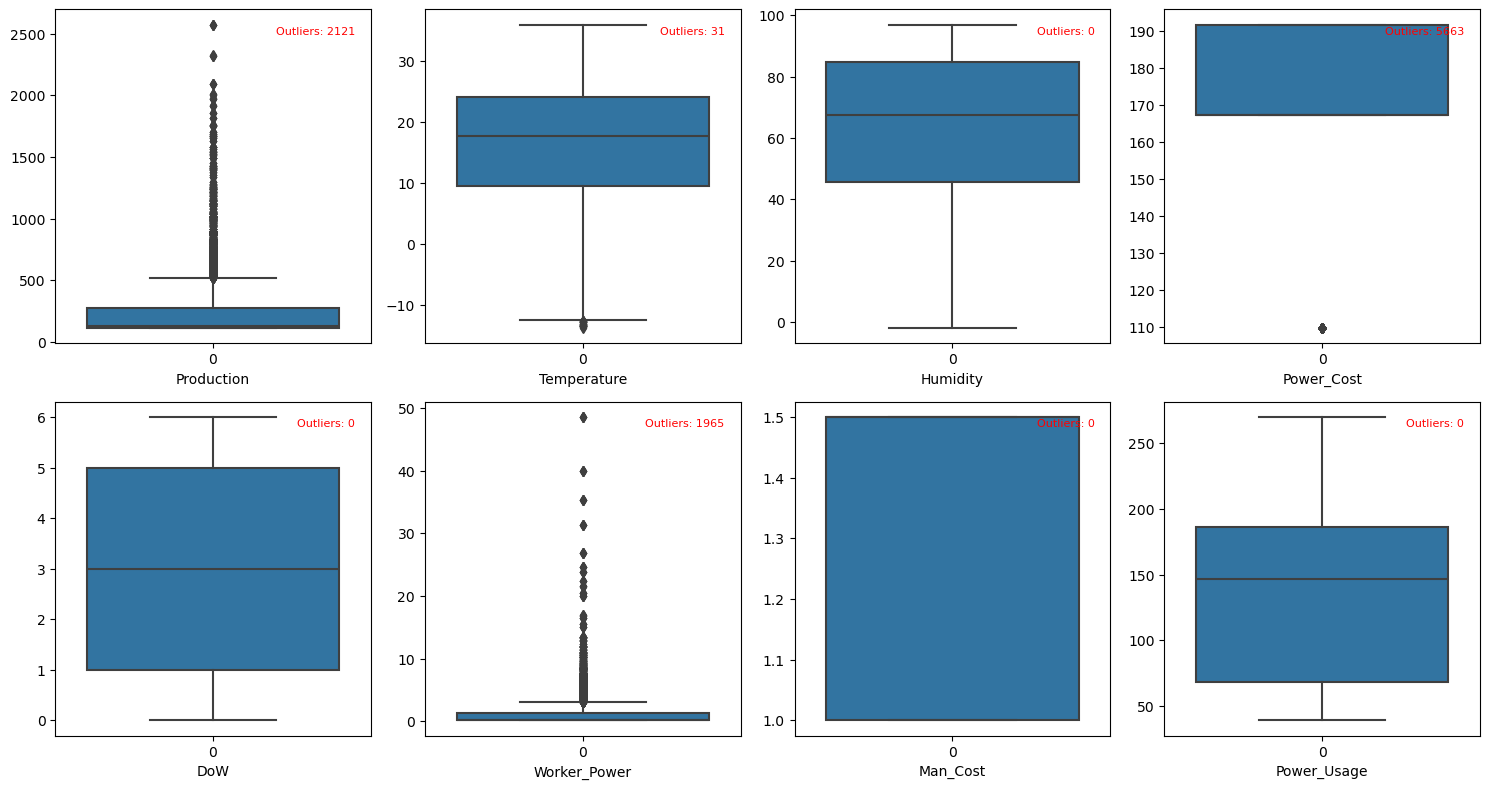

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 숫자형 데이터만 선택
numeric_columns = dowReplace_df.select_dtypes(include=[np.number])

# 박스 플롯을 4개씩 한 행에 배치하여 출력
num_plots = len(numeric_columns.columns)
num_rows = (num_plots - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 4 * num_rows))

for i, column in enumerate(numeric_columns.columns):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(data=dowReplace_df[column], ax=ax)
    ax.set_xlabel(column)

    # 이상치 개수 계산
    outliers_index, outliers_count = detect_and_count_outliers(dowReplace_df, column)
    ax.text(0.95, 0.95, f"Outliers: {outliers_count}", verticalalignment='top', horizontalalignment='right', transform=ax.transAxes, color='red', fontsize=8)

# 마지막으로 그리드의 빈 플롯을 숨기기
for i in range(num_plots, num_rows * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [51]:
temperature_outliers, temperature_outliers_count = detect_and_count_outliers(dowReplace_df, 'Temperature')
Production_outliers, Production_outliers_count = detect_and_count_outliers(dowReplace_df, 'Production')
Power_Cost_outliers, Power_Cost_outliers_count = detect_and_count_outliers(dowReplace_df, 'Power_Cost')
Worker_Power_outliers, Worker_Power_outliers_count = detect_and_count_outliers(dowReplace_df, 'Worker_Power')
#이상치 개수
print("Temperature 이상치의 개수:", temperature_outliers_count)
print("Production 이상치의 개수:", Production_outliers_count)
print("Power_Cost 이상치의 개수:", Power_Cost_outliers_count)
print("Worker_Power 이상치의 개수:", Worker_Power_outliers_count)
#이상치의 행
print("Temperature 이상치의 행 index:", temperature_outliers)
print("Production 이상치의 행 index:", Production_outliers)
print("Power_Cost 이상치의 행 index:", Power_Cost_outliers)
print("Worker_Power 이상치의 행 index:", Worker_Power_outliers)

Temperature 이상치의 개수: 31
Production 이상치의 개수: 2121
Power_Cost 이상치의 개수: 5663
Worker_Power 이상치의 개수: 1965
Temperature 이상치의 행 index: Index([669, 673, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
       690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703,
       704, 705, 706],
      dtype='int64')
Production 이상치의 행 index: Index([  327,   328,   329,   330,   343,   344,   345,   346,   347,   348,
       ...
       24421, 24422, 24427, 24428, 24429, 24430, 24431, 24432, 24433, 24434],
      dtype='int64', length=2121)
Power_Cost 이상치의 행 index: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662],
      dtype='int64', length=5663)
Worker_Power 이상치의 행 index: Index([  327,   328,   329,   330,   343,   344,   345,   346,   347,   348,
       ...
       24365, 24366, 24427, 24428, 24429, 24430, 24431, 24432, 24433, 24434],
      dtype='int64', length=1965)


In [49]:
from collections import Counter

# 이상치의 행 index 모으기
all_outliers = np.concatenate([temperature_outliers, Production_outliers, Power_Cost_outliers, Worker_Power_outliers])

# 각 행의 등장 횟수 세기
outliers_counter = Counter(all_outliers)

# Temperature 열의 이상치가 2번 이상 겹치는 행과 그 횟수 추출
common_outliers = {index: count for index, count in outliers_counter.items() if count >= 2 and index in temperature_outliers}

# 행 번호를 리스트에 담기
common_outliers_list = list(common_outliers.keys())

print("Temperature 열의 이상치가 2번 이상 겹치는 이상치의 행 번호와 횟수:")
for index, count in common_outliers.items():
    print(f"행 번호: {index}, 횟수: {count}")

# 행 번호 리스트 출력
print("행 번호 리스트:", common_outliers_list)

Temperature 열의 이상치가 2번 이상 겹치는 이상치의 행 번호와 횟수:
행 번호: 669, 횟수: 2
행 번호: 673, 횟수: 2
행 번호: 675, 횟수: 2
행 번호: 676, 횟수: 2
행 번호: 677, 횟수: 2
행 번호: 678, 횟수: 2
행 번호: 679, 횟수: 2
행 번호: 680, 횟수: 2
행 번호: 681, 횟수: 2
행 번호: 682, 횟수: 2
행 번호: 683, 횟수: 2
행 번호: 684, 횟수: 2
행 번호: 685, 횟수: 2
행 번호: 686, 횟수: 2
행 번호: 690, 횟수: 2
행 번호: 691, 횟수: 2
행 번호: 692, 횟수: 2
행 번호: 693, 횟수: 2
행 번호: 694, 횟수: 2
행 번호: 695, 횟수: 2
행 번호: 696, 횟수: 2
행 번호: 697, 횟수: 2
행 번호: 698, 횟수: 2
행 번호: 699, 횟수: 3
행 번호: 700, 횟수: 3
행 번호: 701, 횟수: 3
행 번호: 702, 횟수: 3
행 번호: 703, 횟수: 2
행 번호: 704, 횟수: 2
행 번호: 705, 횟수: 2
행 번호: 706, 횟수: 2
행 번호 리스트: [669, 673, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706]
